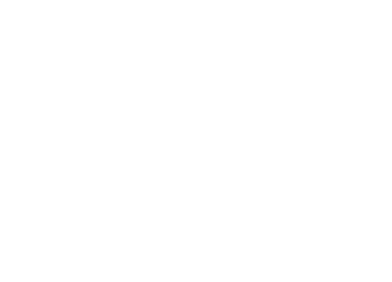

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(5, 15), ylim=(0, 2))
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('T$(^oC)$')
ax.set_ylabel('z(m)')
# ax=plt.gca()
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    # Initialisation of the parameters:
    T0     = 10            # Average surface temperature
    dT     = 5             # Temperature fluctuation
    kappa  = 1e-6          # Thermal diffusivity
    tau    = 24*60*60      # period of oscillation (1 day)
    zmax   = 2             # Max depth to calculate/plot
    nz     = 100           # number of depth for plotting
    tmax   = 24*60*60      # Max depth to calculate/plot 
    nt     = 24            # number of timesteps for plotting
    tplot  = 1*60*60       # time of snapshot for plotting (in sec)
    zplot  = 0.5           # depth for plot (in m)

    omega  = 2*np.pi/tau
    z      = np.linspace(0,zmax,nz)       # create depth array
    t      = np.linspace(0,tmax,nt)       # create depth array

    # plot of T against z for one specific time step:
    zphase = z*np.sqrt(omega/(2*kappa))   # pre-calc z phase delay
    i=0
    Tz     = T0 + dT*np.exp(-zphase)*np.cos(omega*tplot*i-zphase) 
    line.set_data(Tz,z)
    return line,

# animation function.  This is called sequentially
def animate(i):
    # Initialisation of the parameters:
    T0     = 10            # Average surface temperature
    dT     = 5             # Temperature fluctuation
    kappa  = 1e-6          # Thermal diffusivity
    tau    = 24*60*60      # period of oscillation (1 day)
    zmax   = 2             # Max depth to calculate/plot
    nz     = 100           # number of depth for plotting
    tmax   = 24*60*60      # Max depth to calculate/plot 
    nt     = 24            # number of timesteps for plotting
    tplot  = 1*60*60       # time of snapshot for plotting (in sec)
    zplot  = 0.5           # depth for plot (in m)

    omega  = 2*np.pi/tau
    z      = np.linspace(0,zmax,nz)       # create depth array
    t      = np.linspace(0,tmax,nt)       # create depth array

    # plot of T against z for one specific time step:
    zphase = z*np.sqrt(omega/(2*kappa))   # pre-calc z phase delay
    Tz     = T0 + dT*np.exp(-zphase)*np.cos(omega*tplot*i-zphase) 
    line.set_data(Tz,z)
    ax.set_title('T-distribution against depth for t=%1.0f:00 hour' %(tplot*i/60/60))
    return line, ax

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=24, interval=50, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('line3.gif', dpi=80, writer='pillow')

plt.show()